In [1]:
from fastai.data.all import *
from fastai.vision.all import *
import fastai
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('ArtEmisv1.csv')
df

,art_style,painting,emotion,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment,10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe,10
...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,48
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,8
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,8
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,8


In [3]:
df.emotion.unique()

array(['something else', 'sadness', 'contentment', 'awe', 'amusement',
       'excitement', 'fear', 'disgust', 'anger'], dtype=object)

In [9]:
def emtype(x):
    if x.emotion=='sadness':
        return "negative"
    elif x.emotion=='fear':
        return "negative"
    elif x.emotion=='disgust':
        return "negative"
    elif x.emotion=='anger':
        return "negative"
    elif x.emotion=='contentment':
        return "positive"
    elif x.emotion=='awe':
        return "positive"
    elif x.emotion=='amusement':
        return "positive"
    elif x.emotion=='excitement':
        return "positive"
    else:
        return "something else"
    

In [11]:
df['emotype']= df.apply(emtype,axis=1)
df

,art_style,painting,emotion,repetition,emotype
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10,something else
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness,10,negative
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10,something else
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment,10,positive
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe,10,positive
...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,48,positive
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,8,positive
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,8,positive
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,8,positive


In [13]:
dfpro=df.groupby(["art_style","painting"])["emotype"].agg(pd.Series.mode).reset_index()
dfpro

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,"[negative, positive]"
1,Abstract_Expressionism,aaron-siskind_chicago-1951,negative
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,negative
3,Abstract_Expressionism,aaron-siskind_feet-102-1957,"[negative, something else]"
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,positive
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,positive
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,positive
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,positive


In [15]:
t=type(dfpro.emotype[0])
dfpro=dfpro[dfpro["emotype"].apply(lambda x: type(x) !=t )]
dfpro

,art_style,painting,emotype
1,Abstract_Expressionism,aaron-siskind_chicago-1951,negative
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,negative
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else
5,Abstract_Expressionism,aaron-siskind_jerome-arizona-1949,negative
6,Abstract_Expressionism,aaron-siskind_kentucky-4-1951,something else
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,positive
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,positive
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,positive
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,positive


Text(0.5, 1.0, 'Histogram of Classes')

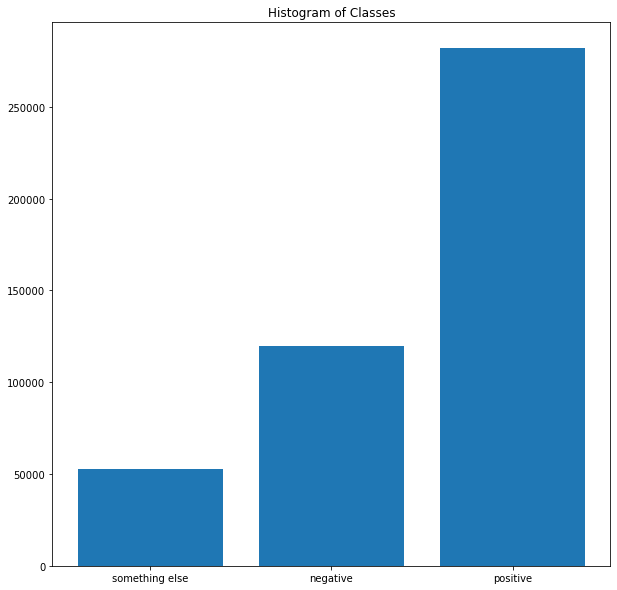

In [12]:
plt.figure(figsize=(10,10))
plt.hist(df.emotype,bins=range(0,4), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

Text(0.5, 1.0, 'Histogram of Classes')

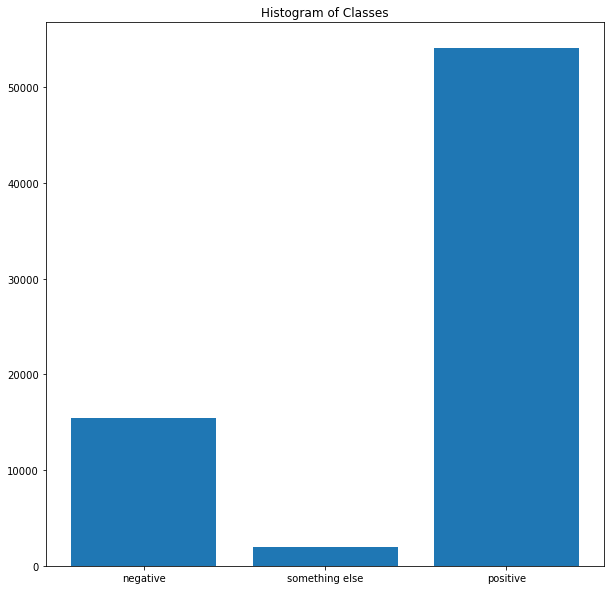

In [17]:
plt.figure(figsize=(10,10))
plt.hist(dfpro.emotype,bins=range(0,4), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

In [49]:
dfm=df

In [50]:
def modo(x):
    if  x.value_counts()[0]>=sum(x.value_counts())*0.8 :
        return pd.Series.mode(x)
    else:
        return x.value_counts()[:3].index.tolist()

In [51]:
dfm=dfm.groupby(["art_style","painting"])["emotype"].agg(modo).reset_index()

In [52]:
dfm

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,"[positive, negative, something else]"
1,Abstract_Expressionism,aaron-siskind_chicago-1951,"[negative, positive, something else]"
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,"[negative, something else]"
3,Abstract_Expressionism,aaron-siskind_feet-102-1957,"[something else, negative, positive]"
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,"[positive, negative]"
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,positive
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,positive
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,positive


In [53]:
t=type(dfm.emotype[0])
dfm=dfm[dfm["emotype"].apply(lambda x: type(x) !=t )]
dfm

,art_style,painting,emotype
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else
7,Abstract_Expressionism,aaron-siskind_new-york-1951,negative
9,Abstract_Expressionism,aaron-siskind_new-york-24-1988,negative
10,Abstract_Expressionism,aaron-siskind_new-york-40-1986,negative
11,Abstract_Expressionism,aaron-siskind_new-york-city-w-1-1947,negative
...,...,...,...
80020,Ukiyo_e,utagawa-toyokuni_kabuki-actors-sanogawa-ichimatsu-ii-as-hayano-kampei-and-osagawa-tsuneyo-as-onoe,positive
80025,Ukiyo_e,utagawa-toyokuni_seki-sanjuro,positive
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,positive
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,positive


Text(0.5, 1.0, 'Histogram of Classes')

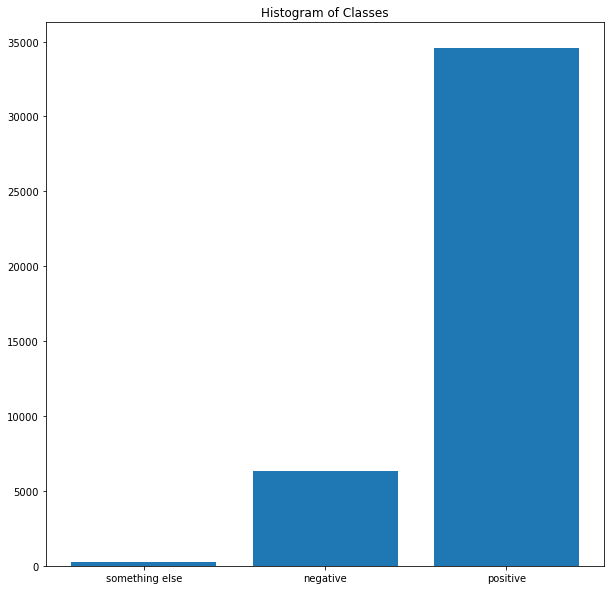

In [54]:
plt.figure(figsize=(10,10))
plt.hist(dfm.emotype,bins=range(0,4), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

In [62]:
dfemo=df


In [61]:
def modo(x):
    if  x.value_counts()[0]>=sum(x.value_counts())*1 :
        return pd.Series.mode(x)
    else:
        return x.value_counts()[:3].index.tolist()

In [63]:
dfemo=dfemo.groupby(["art_style","painting"])["emotion"].agg(modo).reset_index()

In [64]:
dfemo

,art_style,painting,emotion
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,"[fear, contentment, something else]"
1,Abstract_Expressionism,aaron-siskind_chicago-1951,"[fear, sadness, something else]"
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,"[fear, something else]"
3,Abstract_Expressionism,aaron-siskind_feet-102-1957,"[something else, disgust, contentment]"
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,"[something else, fear]"
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,"[fear, amusement, contentment]"
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,"[contentment, disgust, excitement]"
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,"[contentment, excitement, sadness]"
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,"[contentment, awe, something else]"


In [65]:
t=type(dfemo.emotion[0])
dfemo=dfemo[dfemo["emotion"].apply(lambda x: type(x) !=t )]
dfemo

,art_style,painting,emotion
120,Abstract_Expressionism,atsuko-tanaka_untitled,amusement
410,Abstract_Expressionism,cy-twombly_untitled-5,fear
425,Abstract_Expressionism,cy-twombly_zyig,fear
521,Abstract_Expressionism,esteban-vicente_faraway-1970,fear
549,Abstract_Expressionism,eva-hesse_no-title-1960,fear
...,...,...,...
79705,Ukiyo_e,utagawa-kuniyoshi_heroes-of-china-and-japan,fear
79788,Ukiyo_e,utagawa-kuniyoshi_sailing-boat,contentment
79813,Ukiyo_e,utagawa-kuniyoshi_sotoku-invoking-a-thunder-storm,fear
79874,Ukiyo_e,utagawa-kuniyoshi_the-ghost-in-the-lantern,fear


Text(0.5, 1.0, 'Histogram of Classes')

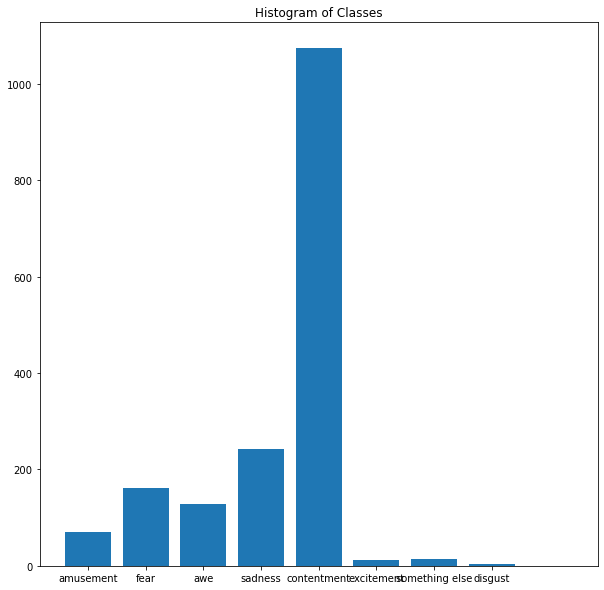

In [66]:
plt.figure(figsize=(10,10))
plt.hist(dfemo.emotion,bins=range(0,10), rwidth=0.8,align="left")
plt.title('Histogram of Classes')